<a href="https://colab.research.google.com/github/sophiasagan/Computer_Vision/blob/main/Transfer_Learning_Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import tensorflow as tf
import os 
import cv2 as cv2 


In [ ]:
dataset = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets"
Train_path  = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-train"
Test_path = r"C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-test"

In [ ]:
dirls = os.listdir(Train_path)
print(dirls.__len__())
print(dirls)

val  = Train_path + '\\' +dirls[0]
print(val)


29
['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
C:\Users\USER\Downloads\MLI\Images\ASL_datasets\asl-alphabet-train\A


In [ ]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_class = sorted(dir_list)
    for i in range(len(unique_class)):
        newpath = Train_path + "\\" + unique_class[i]
        pathnames.append(newpath)
    return(pathnames, unique_class)

In [ ]:
path, classes = loading_images(Train_path)

In [ ]:
print(path)
print(classes)

['C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\B', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\C', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\D', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\E', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\F', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\G', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\H', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\I', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\J', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\K', 'C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\L', 'C:\\Users\\USER\\Downloads\\MLI\\Image

In [ ]:
def labeling_images(unique_paths, unique_classes):
    img_path = []
    label = []
    for path, Label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "\\" + i
            img_path.append(img_dir_list)
            label.append(Label)
    return(img_path, label)

In [ ]:
img_path , labels = labeling_images(path, classes)

In [ ]:
print(img_path.__len__())

870


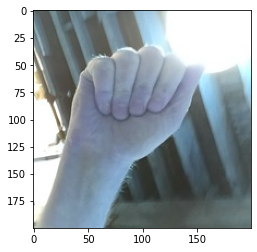

In [ ]:
img = cv2.imread(img_path[0])
plt.imshow(img)

In [ ]:
dataset = list(zip(img_path, labels))

In [ ]:
dataset[0:5]

[('C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0001_test.jpg',
  'A'),
 ('C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0002_test.jpg',
  'A'),
 ('C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0003_test.jpg',
  'A'),
 ('C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0004_test.jpg',
  'A'),
 ('C:\\Users\\USER\\Downloads\\MLI\\Images\\ASL_datasets\\asl-alphabet-train\\A\\A0005_test.jpg',
  'A')]

In [ ]:
dataset_df = pd.DataFrame(dataset, columns= ['Img_Path', 'Labels'])

In [ ]:
dataset_df.head()

,Img_Path,Labels
0,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,A
1,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,A
2,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,A
3,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,A
4,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,A


In [ ]:
dataset_df.tail()

,Img_Path,Labels
865,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,space
866,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,space
867,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,space
868,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,space
869,C:\Users\USER\Downloads\MLI\Images\ASL_dataset...,space


In [ ]:
dataset_df.Labels.value_counts()

K          30
F          30
U          30
S          30
V          30
B          30
I          30
D          30
space      30
P          30
J          30
G          30
X          30
M          30
Z          30
H          30
del        30
A          30
T          30
Y          30
Q          30
nothing    30
R          30
W          30
N          30
L          30
E          30
O          30
C          30
Name: Labels, dtype: int64

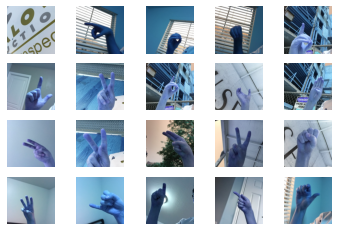

In [ ]:
for i in range(0, 20):
    vals = np.random.randint(1, len(dataset_df))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.imread(dataset_df.Img_Path[vals]))
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,  GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
Train, Test = train_test_split(dataset_df, train_size=0.8, random_state=0)
Train_new, valid = Train, Test = train_test_split(dataset_df, train_size=0.90, random_state=0)
print(Train.shape, Test.shape, valid.shape, Train_new.shape)

(783, 2) (87, 2) (87, 2) (783, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, 
                                  zoom_range=0.1, horizontal_flip=True, vertical_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='Img_Path', y_col= 'Labels', batch_size=16,
                                             target_size=(64,64), class_mode='categorical', shuffle=True)
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='Img_Path', y_col= 'Labels', batch_size=16,
                                             target_size=(64,64), class_mode='categorical', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe=Test, x_col='Img_Path', y_col= 'Labels', batch_size=16,
                                             target_size=(64,64), class_mode='categorical', shuffle=True)

Found 783 validated image filenames belonging to 29 classes.
Found 87 validated image filenames belonging to 29 classes.
Found 87 validated image filenames belonging to 29 classes.


In [ ]:
train_gen[0][0].shape

(16, 64, 64, 3)

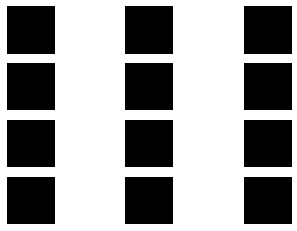

In [ ]:
for i in range(0, 12):
    val = train_gen[0][0][i]
    vals = val.astype('uint8')
    plt.subplot(4,3, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(200,200,3), include_top=False)
network = Sequential()
network.add(base_model)
network.add(GlobalAveragePooling2D())
network.add(Dense(128, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(29, activation='softmax'))

In [ ]:
network.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
network.fit(train_gen, epochs=100, validation_data=valid_gen, verbose=2)

Epoch 1/5
49/49 - 85s - loss: 68682464.0000 - accuracy: 0.0396 - val_loss: 3.6395 - val_accuracy: 0.0690
Epoch 2/5
49/49 - 85s - loss: 3.3979 - accuracy: 0.0281 - val_loss: 3.3799 - val_accuracy: 0.0115
Epoch 3/5
49/49 - 86s - loss: 3.3713 - accuracy: 0.0345 - val_loss: 3.3834 - val_accuracy: 0.0230
Epoch 4/5
49/49 - 83s - loss: 3.3704 - accuracy: 0.0281 - val_loss: 3.3861 - val_accuracy: 0.0115
Epoch 5/5
49/49 - 86s - loss: 3.3697 - accuracy: 0.0281 - val_loss: 3.3867 - val_accuracy: 0.0230
